In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import joblib

In [2]:
data = 'Test_for_vidcap'

datagen = ImageDataGenerator(samplewise_center=False,
                             samplewise_std_normalization=False,
                             horizontal_flip = True,
                             vertical_flip = False,
                             height_shift_range = 0.15,
                             width_shift_range = 0.15,
                             rotation_range = 5,
                             shear_range = 0.01,
                             fill_mode = 'nearest',
                             zoom_range=0.10)

train_it = datagen.flow_from_directory(data,
                                       target_size=(224,224),
                                       batch_size=1,
                                       color_mode='rgb',
                                       class_mode='categorical')

base_model = keras.applications.ResNet50( weights='imagenet', input_shape=(224,224, 3), include_top=False)
inputs = keras.Input(shape=(224,224, 3))

x = base_model(inputs, training=False)

Found 8204 images belonging to 1680 classes.


In [7]:
# Add pooling layer or flatten layer
x = keras.layers.Flatten()(x)
# Add final dense layer
outputs = keras.layers.Dense(1, activation = 'softmax')(x)
# Combine inputs and outputs to create model
model = keras.Model(inputs=inputs, outputs=outputs)

base_model.trainable = False

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = 0.0001),
              loss = 'categorical_crossentropy' , metrics = ['accuracy'])

history = model.fit(train_it,steps_per_epoch=100,epochs=30)

Epoch 1/30
100/100 [==============================] - 11s 83ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/30
100/100 [==============================] - 9s 87ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/30
100/100 [==============================] - 9s 87ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/30
100/100 [==============================] - 9s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/30
100/100 [==============================] - 9s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/30
100/100 [==============================] - 9s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/30
100/100 [==============================] - 9s 88ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/30
100/100 [==============================] - 9s 89ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/30
100/100 [==============================] -

In [5]:
#save model
filename = 'model_saved.sav'
joblib.dump(model, filename)

NameError: name 'model' is not defined

In [3]:
#load saved model
filename = 'model_saved.sav'
model = joblib.load(filename)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-01-03 23:31:26        86448
metadata.json                                  2023-01-03 23:31:26           64
variables.h5                                   2023-01-03 23:31:26     95624088
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\flatten
......vars
...layers\flatten_1
......vars
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\lay

In [4]:
import cv2
import sys
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

cascPath = sys.argv[1]
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)
image = video_capture.read()
count = 0

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    #saves frame as jpg file
    cv2.imwrite("C:\Test_for_vidcap\%d.jpg" % count, frame)
    
#     predicting images
    path = 'C:\Test_for_vidcap\%d.jpg' % count
    img = load_img(path, target_size=(224,224))
#     imgplot = plt.imshow(img)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    if classes[0][0]==1:
        print('Theo')
    else:
        print('scissors')

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
    
#     count += 1

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# # press escape to exit
#     if (cv2.waitKey(30) == 27):
#        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 1s 823ms/step
Theo
1/1 [==============================] - 0s 104ms/step
Theo
1/1 [==============================] - 0s 81ms/step
Theo
1/1 [==============================] - 0s 77ms/step
Theo
1/1 [==============================] - 0s 81ms/step
Theo
1/1 [==============================] - 0s 77ms/step
Theo
1/1 [==============================] - 0s 86ms/step
Theo
1/1 [==============================] - 0s 74ms/step
Theo
1/1 [==============================] - 0s 84ms/step
Theo
1/1 [==============================] - 0s 79ms/step
Theo
1/1 [==============================] - 0s 78ms/step
Theo
1/1 [==============================] - 0s 80ms/step
Theo
1/1 [==============================] - 0s 76ms/step
Theo
1/1 [==============================] - 0s 85ms/step
Theo
1/1 [==============================] - 0s 81ms/step
Theo
1/1 [==============================] - 0s 84ms/step
Theo
1/1 [==============================] - 0s 77ms/step
Theo
1/1 [========================

1/1 [==============================] - 0s 63ms/step
Theo
1/1 [==============================] - 0s 63ms/step
Theo
1/1 [==============================] - 0s 62ms/step
Theo
1/1 [==============================] - 0s 63ms/step
Theo
1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 63ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 62ms/step
Theo
1/1 [==============================] - 0s 63ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 70ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 71ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 72ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==========================

1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 64ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 65ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==========================

1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 71ms/step
Theo
1/1 [==============================] - 0s 71ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==========================

1/1 [==============================] - 0s 66ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 77ms/step
Theo
1/1 [==============================] - 0s 73ms/step
Theo
1/1 [==============================] - 0s 69ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 67ms/step
Theo
1/1 [==============================] - 0s 68ms/step
Theo
1/1 [==========================

KeyboardInterrupt: 

In [6]:
# cap = cv2.VideoCapture(0)
# while True:
#     ret, frame = cap.read()
#     frame = cv2.cvtColor(src=frame, code=cv2.COLOR_BGR2RGB)
#     cv2.imshow('webcam', frame)
# # press escape to exit
#     if (cv2.waitKey(30) == 27):
#        break
# cap.release()
# cv2.destroyAllWindows()

1/1 [==============================] - 2s 2s/step
Lfw_2/Theodore/me_image1.jpg
Theo


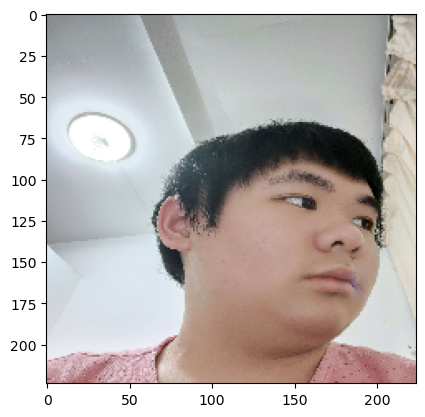

In [10]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
  
 
# predicting images
path = 'Lfw_2/Theodore/me_image1.jpg'
img = load_img(path, target_size=(224,224))
imgplot = plt.imshow(img)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)

if classes[0][0]==1:
    print('paper')
elif classes[0][5]==1:

    print('Theo')
else:
    print('scissors')

In [22]:
print(classes)

[[6.4619191e-12 1.7181580e-10 1.9073856e-10 4.5711004e-12 6.8856415e-10
  1.0000000e+00]]
